<a href="https://colab.research.google.com/github/yunseo4401/ML/blob/master/2021311041_%EA%B9%80%EC%9C%A4%EC%84%9C_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EC%9E%85%EB%AC%B8_%EC%A4%91%EA%B0%84%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

#데이터 불러오기 
session=pd.read_csv('/content/drive/MyDrive/sessions.csv')
user1=pd.read_csv('/content/drive/MyDrive/train_users_2.csv')
user2=pd.read_csv('/content/drive/MyDrive/test_users.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 정보 확인 

In [ ]:
#user데이터가 두개로 나누어져 있으므로 하나로 합쳐준다.
user=pd.concat([user1,user2],axis=0,ignore_index=True) 

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   275547 non-null  object 
 5   age                      158681 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  269462 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

In [ ]:
user.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
#필요한것만 뽑기 
user=user.loc[:,['id','date_account_created','date_first_booking','signup_method','gender','age','country_destination']]
user

,id,date_account_created,date_first_booking,signup_method,gender,age,country_destination
0,gxn3p5htnn,2010-06-28,NaN,facebook,-unknown-,NaN,NDF
1,820tgsjxq7,2011-05-25,NaN,facebook,MALE,38.0,NDF
2,4ft3gnwmtx,2010-09-28,2010-08-02,basic,FEMALE,56.0,US
3,bjjt8pjhuk,2011-12-05,2012-09-08,facebook,FEMALE,42.0,other
4,87mebub9p4,2010-09-14,2010-02-18,basic,-unknown-,41.0,US
...,...,...,...,...,...,...,...
275542,cv0na2lf5a,2014-09-30,NaN,basic,-unknown-,31.0,NaN
275543,zp8xfonng8,2014-09-30,NaN,basic,-unknown-,NaN,NaN
275544,fa6260ziny,2014-09-30,NaN,basic,-unknown-,NaN,NaN
275545,87k0fy4ugm,2014-09-30,NaN,basic,-unknown-,NaN,NaN


In [ ]:
#칼럼 확인 
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    275547 non-null  object 
 1   date_account_created  275547 non-null  object 
 2   date_first_booking    88908 non-null   object 
 3   signup_method         275547 non-null  object 
 4   gender                275547 non-null  object 
 5   age                   158681 non-null  float64
 6   country_destination   213451 non-null  object 
dtypes: float64(1), object(6)
memory usage: 14.7+ MB


# 데이터 전처리 

In [ ]:
#이상치가 있는듯하다 
user['age'].value_counts()

30.0      7712
28.0      7687
29.0      7647
31.0      7540
27.0      7462
          ... 
1953.0       1
132.0        1
150.0        1
112.0        1
1941.0       1
Name: age, Length: 145, dtype: int64

In [ ]:
#boxplot을 그리기위해서 일단 결측값을 평균으로 대체해준다. 
user['age']=user['age'].fillna(user['age'].mean())

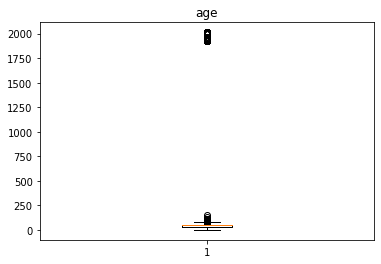

In [ ]:
#boxplot그리기. 이상치 확인 whis를 일부러 1.5가 아닌 2.5로 설정. 
#1.5로 설정시 너무 많은 이상치가 생긴다. 
import matplotlib.pyplot as plt
plt.boxplot(user['age'],whis=2.5)
plt.title('age')
plt.show()

In [ ]:
#이상치 제거 함수 
def outliers_iqr(dt,col):
  quartile_1,quartile_3=np.percentile(dt[col],[25,75])
  iqr=quartile_3-quartile_1
  lower_whis=quartile_1-(iqr*2.5)
  upper_whis=quartile_3+(iqr*2.5)
  outliers=dt[(dt[col]>upper_whis)|(dt[col]<lower_whis)]
  return outliers[[col]]
outliers=outliers_iqr(user,'age')
outliers

,age
388,2014.0
398,104.0
627,105.0
645,95.0
673,2014.0
...,...
274575,92.0
274610,105.0
274793,105.0
274824,105.0


In [ ]:
#이상치 값을 결측값으로 바꾼뒤, 이를 평균으로 대체해준다. 
user.loc[outliers.index,'age']=None
user['age']=user['age'].fillna(user['age'].mean())
user['age']=user['age'].astype(int)

In [ ]:
#성별 확인.결측값 대신 unknown과 other 값이 있다. 
user['gender'].value_counts()

-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

In [ ]:
user.loc[(user['gender']=='-unknown-')|(user['gender']=='OTHER')]=None #성별 unknown을 결측값으로 바꾸고 
user=user.dropna(subset=['gender']) #성별 결측값 삭제 
user['gender'].value_counts()

FEMALE    77524
MALE      68209
Name: gender, dtype: int64

In [ ]:
#['date_first_booking','date_account_created']의 결측값 제거. 결측값은 계산할 수 없기 때문
user=user.dropna(subset=['date_first_booking','date_account_created'])

user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59714 entries, 2 to 213445
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    59714 non-null  object 
 1   date_account_created  59714 non-null  object 
 2   date_first_booking    59714 non-null  object 
 3   signup_method         59714 non-null  object 
 4   gender                59714 non-null  object 
 5   age                   59714 non-null  float64
 6   country_destination   59714 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.6+ MB


In [ ]:
#위 두 칼럼은 object형식으로 제시되었기 때문에 날짜 형식으로 바꾸어준다. 
user['date_account_created']=pd.to_datetime(user['date_account_created'],format='%Y-%m-%d %H:%M:%S')
user['date_first_booking']=pd.to_datetime(user['date_first_booking'],format='%Y-%m-%d %H:%M:%S')

#datetime함수를 통해 두 값을 빼준다. 
from datetime import timedelta
user['gap_booking']=user['date_first_booking']-user['date_account_created']
#이값을 'gap_booking'이라는 새로운 칼럼을 만들어 담는다. 
user['gap_booking']=user['gap_booking'].dt.days

#뺀값이 음수인경우는 제외해준다. 
idx=user[user['gap_booking']<0].index
user.drop(idx,inplace=True)

#원래 있던 두 칼럼은 없애준다. 
user=user.drop(columns=['date_account_created','date_first_booking'])

user

,id,signup_method,gender,age,country_destination,gap_booking
3,bjjt8pjhuk,facebook,FEMALE,42.0,other,278
6,lsw9q7uk0j,basic,FEMALE,46.0,US,3
7,0d01nltbrs,basic,FEMALE,47.0,US,10
8,a1vcnhxeij,basic,FEMALE,50.0,US,206
10,yuuqmid2rp,basic,FEMALE,36.0,US,2
...,...,...,...,...,...,...
213412,a1rvlsdijt,basic,FEMALE,50.0,US,207
213439,msucfwmlzc,basic,MALE,43.0,US,259
213441,omlc9iku7t,basic,FEMALE,34.0,ES,44
213443,0k26r3mir0,basic,FEMALE,36.0,US,13


In [ ]:
#나라 칼럼 확인 ,other이 결측값으로 제시 
user['country_destination'].value_counts()

US       42133
other     6602
FR        3297
IT        1788
GB        1562
ES        1530
CA         930
DE         773
NL         532
AU         394
PT         147
Name: country_destination, dtype: int64

In [ ]:
user.loc[(user['country_destination']=='other')]=None
#other을 nan값으로 바꾸어 주고 
user['country_destination']=user['country_destination'].fillna(method='pad')
#결측값을 이전 값으로 대체 
user['country_destination'].value_counts()

US    47321
FR     3715
IT     1997
GB     1778
ES     1724
CA     1043
DE      887
NL      595
AU      457
PT      170
Name: country_destination, dtype: int64

In [ ]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [ ]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
#아이디별로 사용한 시간의 평균을 담음 
session=session.groupby('user_id').mean()
#결측값은 없앰
session=session.dropna(subset=['secs_elapsed'])
session.info()
#정수화 
session['secs_elapsed']=session['secs_elapsed'].astype(int)
session




<class 'pandas.core.frame.DataFrame'>
Index: 134057 entries, 00023iyk9l to zzzlylp57e
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   secs_elapsed  134057 non-null  float64
dtypes: float64(1)
memory usage: 2.0+ MB


,secs_elapsed
user_id,
00023iyk9l,22253
0010k6l0om,9460
001wyh0pz8,3179
0028jgx1x1,9900
002qnbzfs5,8232
...,...
zzxox7jnrx,7266
zzy7t0y9cm,10538
zzysuoqg6x,865


In [ ]:
#session데이터와 user데이터를 합쳐줌 (아이디가 겹치는 것만)
A=user.merge(session,how='inner',left_on='id',right_on='user_id',sort=True)
A

,id,signup_method,gender,age,country_destination,gap_booking,secs_elapsed
0,002qnbzfs5,facebook,FEMALE,26.0,US,0.0,8232
1,0035hobuyj,basic,FEMALE,47.0,US,2.0,11730
2,006t3vhawl,basic,FEMALE,67.0,US,5.0,31362
3,006z8b0uws,facebook,MALE,30.0,US,8.0,27018
4,00bxmflswn,basic,FEMALE,23.0,FR,0.0,33398
...,...,...,...,...,...,...,...
15956,zzlo8vf821,facebook,FEMALE,31.0,US,0.0,16524
15957,zzpauwg2r8,basic,FEMALE,45.0,US,9.0,47147
15958,zzq55plahq,facebook,MALE,32.0,US,1.0,18751
15959,zzv8sgicbk,basic,MALE,27.0,US,0.0,19295


In [ ]:
#독립변수로 사용할 범주형 변수들을 이산형 변수로 바꿔주기 위해서 원핫인코딩을 진행 
A=pd.get_dummies(data=A,columns=['gender'])
A=pd.get_dummies(data=A,columns=['signup_method'])
A=pd.get_dummies(data=A,columns=['country_destination'])

In [ ]:
#target변수도 이산형으로 바꿔줌 
A['gap_booking'].mean()
A['gap_booking']=np.where(A['gap_booking']>49,1,0)

In [ ]:
#최종A데이터 겹치는 것만 담아서 데이터가 많이 손실됨 총 15
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15961 entries, 0 to 15960
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      15961 non-null  object 
 1   age                     15961 non-null  float64
 2   gap_booking             15961 non-null  int64  
 3   secs_elapsed            15961 non-null  int64  
 4   gender_FEMALE           15961 non-null  uint8  
 5   gender_MALE             15961 non-null  uint8  
 6   signup_method_basic     15961 non-null  uint8  
 7   signup_method_facebook  15961 non-null  uint8  
 8   signup_method_google    15961 non-null  uint8  
 9   country_destination_AU  15961 non-null  uint8  
 10  country_destination_CA  15961 non-null  uint8  
 11  country_destination_DE  15961 non-null  uint8  
 12  country_destination_ES  15961 non-null  uint8  
 13  country_destination_FR  15961 non-null  uint8  
 14  country_destination_GB  15961 non-null

# 데이터 분리 및 스케일링

In [ ]:
x_data=A[['age','gender_FEMALE','gender_MALE','signup_method_basic','signup_method_facebook','signup_method_google',
             'country_destination_AU','country_destination_CA','country_destination_DE','country_destination_ES','country_destination_FR','country_destination_GB',
             'country_destination_IT','country_destination_NL','country_destination_PT','country_destination_US','secs_elapsed']].to_numpy()
y_data=A[['gap_booking']].to_numpy()

In [ ]:
#train_test_split함수를 통해서 4:1의 비율로 훈련세트와 테스트세트를 나눈다. 
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(x_data,y_data,test_size=0.2,random_state=42)
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(12768, 17) (12768, 1)
(3193, 17) (3193, 1)


In [ ]:
#input 데이터 스케일링 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)
print(train_scaled.shape,test_scaled.shape)

(12768, 17) (3193, 17)


In [ ]:
#분류모델에서 정확도가 과도하게 높아지는 것을 막기 위해 오버샘플링 중 SMOTE를 이용한다. 
#target데이터가 불균형데이터로 예상되기 때문이다. 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
train_scaled_over, train_target_over = smote.fit_resample(train_scaled, train_target)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", train_scaled.shape, train_target.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', train_scaled_over.shape, train_target_over.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (12768, 17) (12768, 1)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (19030, 17) (19030,)


# 모델링

In [ ]:
#로지스틱 회귀 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=100,C=0.01,solver='liblinear')
logreg.fit(train_scaled_over, train_target_over.ravel())
pred_log=logreg.predict(test_scaled)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


test_acc=accuracy_score(test_target.ravel(), pred_log) 
test_cm=confusion_matrix(test_target.ravel(),pred_log)
test_prc=precision_score(test_target.ravel(),pred_log)
test_rcll=precision_score(test_target.ravel(),pred_log)
test_f1=f1_score(test_target.ravel(),pred_log)

print(test_cm)
print('\n')
print('정확도:',round(test_acc*100,2))
print('정밀도:',round(test_prc*100,2)) 
print('재현율:',round(test_rcll*100,2))  
print('F1:',round(test_f1*100,2)) 

[[1322 1076]
 [ 342  453]]


정확도: 55.59
정밀도: 29.63
재현율: 29.63
F1: 38.98


In [ ]:
#랜덤포레스트 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,min_samples_split=5)
rfc.fit(train_scaled_over , train_target_over)
pred = rfc.predict(test_scaled)
test_acc=accuracy_score(test_target, pred) 
print(test_acc)

0.6038208581271531


In [ ]:
#랜덤포레스트 그리드서치 수행 
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(rfc,params,n_jobs=-1,cv=3)
A=gs.fit(train_scaled_over,train_target_over)
dt=gs.best_estimator_
print(dt.score(train_scaled,train_target))
print(dt)

0.6696428571428571
RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=16)


In [ ]:
#XGBoost수행 
from xgboost.sklearn import XGBClassifier
eval=[(test_scaled,test_target)]
xgb = XGBClassifier(max_depth=10, learning_rate=0.03, n_estimators=100,
                    objective='binary:logistic', subsample=0.6, colsample_bytree=0.6, seed=40,early_stopping_rounds=100,
                    eval_set=eval,verbose=1
                    )
xgb.fit(train_scaled_over,train_target_over.ravel())
pred = xgb.predict(test_scaled) 
test_acc=accuracy_score(test_target.ravel(), pred) 
print(test_acc)

0.6348261822737238


In [ ]:
#XGBoost그리드 서치 수행 
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[100, 200, 400,600],'max_depth': [4,6, 8, 10,12],'learning_rate':[0.01,0.03,0.06,0.1]}
gs=GridSearchCV(xgb,params,n_jobs=-1,cv=3,scoring='accuracy',verbose=1)
gs.fit(train_scaled_over,train_target_over)
dt=gs.best_estimator_
print(dt.score(train_scaled,train_target))
print(dt)
print(gs.cv_results_['mean_test_score'])
best_index=np.argmax(gs.cv_results_['mean_test_score'])


Fitting 3 folds for each of 80 candidates, totalling 240 fits
0.8240914786967418
XGBClassifier(colsample_bytree=0.6, early_stopping_rounds=100,
              eval_set=[(array([[ 0.34511091,  0.91957606, -0.91957606, ..., -0.05535223,
         0.47717115, -0.28338647],
       [-0.82526521, -1.08745763,  1.08745763, ..., -0.05535223,
         0.47717115, -0.43029089],
       [-0.28509162,  0.91957606, -0.91957606, ..., -0.05535223,
         0.47717115, -0.35062269],
       ...,
       [-1.00532307,  0.91957606, -0.91957606, ..., -0.05535223,
         0.47717115, -0.53342442],
       [-0.28509162,  0.91957606, -0.91957606, ..., -0.05535223,
         0.47717115, -0.31061593],
       [-0.10503375, -1.08745763,  1.08745763, ..., -0.05535223,
         0.47717115, -0.28127994]]),
                         array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]]))],
              learning_rate=0.03, max_depth=12, n_estimators=600, seed=40,
              subsample=0.6, 

In [ ]:
#실제값과 예측값 비교
for i in range(10):
  print('real:',test_target[i],'[predict:',pred[i])

real: [0] [predict: 1
real: [0] [predict: 1
real: [0] [predict: 0
real: [0] [predict: 0
real: [0] [predict: 1
real: [0] [predict: 1
real: [1] [predict: 1
real: [0] [predict: 0
real: [0] [predict: 0
real: [1] [predict: 1


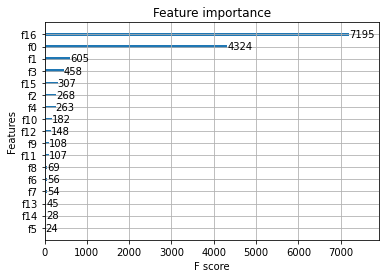

In [ ]:
#변수 중요도 확인 
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb)
pyplot.show()
#f16은 US
#f10은 IT
#f1은 age
#f3은 gendermale

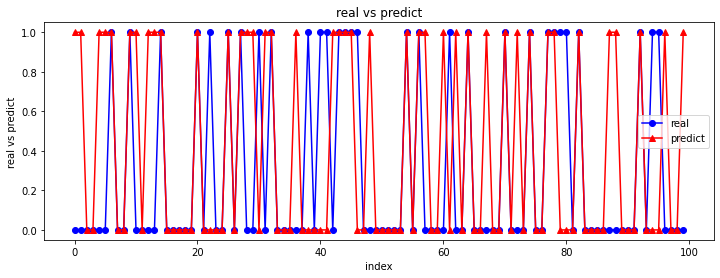

In [ ]:
import matplotlib.pyplot as plt



fig = plt.figure( figsize = (12, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(test_target[:100], marker='o', color='blue', label='real')
chart.plot(pred[:100], marker='^', color='red', label='predict')
chart.set_title('real vs predict')
plt.xlabel('index')
plt.ylabel('real vs predict')
plt.legend(loc = 'best') 